In [1]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Using TensorFlow backend.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [2]:
import glob
import pandas as pd
# 先不讀取圖片, 真的要訓練時才讀
df = pd.DataFrame(columns=['path', 'target'])
for p in glob.glob('train_data/cat.*.jpg'):
    s = pd.Series([p, 0], index=['path', 'target'])
    df = df.append(s, ignore_index=True)
for p in glob.glob('train_data/dog.*.jpg'):
    s = pd.Series([p, 1], index=['path', 'target'])
    df = df.append(s, ignore_index=True)
df

,path,target
0,train_data\cat.001.jpg,0
1,train_data\cat.002.jpg,0
2,train_data\cat.003.jpg,0
3,train_data\cat.004.jpg,0
4,train_data\cat.005.jpg,0
5,train_data\cat.006.jpg,0
6,train_data\cat.007.jpg,0
7,train_data\cat.008.jpg,0
8,train_data\cat.009.jpg,0
9,train_data\cat.010.jpg,0


train_data\cat.002.jpg
(178, 119)


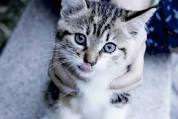

In [3]:
from keras.preprocessing.image import load_img
import random
c = random.randint(0, 9)
print(df['path'][c])
img = load_img(df['path'][c])
print(img.size)
img


(224, 224)


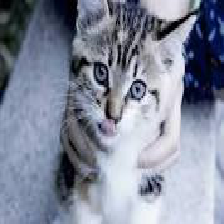

In [4]:
img = load_img(df['path'][c], target_size=(224, 224))
print(img.size)
img

In [5]:
from keras.models import Model
from keras.layers import Flatten, Dense, BatchNormalization
# CNN(眼睛)
for l in vgg.layers:
    l.trainable = False
# BN(血管)
x = BatchNormalization()(vgg.output) 
# MLP(大腦)
x = Flatten()(x)
x = Dense(units=2048, activation='relu')(x)
x = Dense(units=256, activation='relu')(x)
# 貓和狗分類 : units = 1,  units = 2 都可以
#           : sigmoid  ,  softmax
x = Dense(units=2, activation='softmax')(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [6]:
vgg.layers

In [7]:
cnn.compile(loss='categorical_crossentropy',
            metrics=['accuracy'],
            optimizer='adam')

In [8]:
from sklearn.model_selection import train_test_split
# 真的要開始切分和訓練的時候, 請你把你的Pandas轉成numpy的array
# 先處理一下答案, 把它傳化成為one-hot
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(df['target'])
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(np.array(df['path']),
                                                    np.array(y_cat),
                                                    test_size=0.1)
# Show一個y_train
y_train[0]

array([0., 1.], dtype=float32)

In [9]:
# 你偷誰的模型, 就要使用他的預處理方式 (圖型處理)
from keras.applications.vgg16 import preprocess_input
#batch_size = 200
batch_size = 20
for i in range(4):
    # randint(下限(包括), 上限(不包括), 幾個)
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    # x_train.shape[0]
    # numpy好用之處: array [索引 list]

    imglist = []
    for fn in x_train[idx]:
        # 讀取圖片並且使用我們偷來的模型的預處理方式來處理一下
        img = load_img(fn, target_size=(224, 224))
        img = preprocess_input(np.array(img))
        imglist.append(img)
    x = np.array(imglist)
    y = y_train[idx]
    result = cnn.train_on_batch(x, y)
    print('-----Times:',i, '-----')
    print(result)


-----Times: 0 -----
[1.6145321, 0.6]
-----Times: 1 -----
[5.8456793, 0.7]
-----Times: 2 -----
[0.2914763, 0.95]
-----Times: 3 -----
[3.6568923, 0.75]


In [10]:
#batch_size = 200
batch_size = 20
# randint(下限(包括), 上限(不包括), 幾個)
idx = np.random.randint(0, x_test.shape[0], batch_size)
# x_train.shape[0]
# numpy好用之處: array [索引 list]

imglist = []
oriimglist = []
for fn in x_test[idx]:
    # 讀取圖片並且使用我們偷來的模型的預處理方式來處理一下
    img = load_img(fn, target_size=(224, 224))
    img = preprocess_input(np.array(img))
    imglist.append(img)
x = np.array(imglist)
y = y_test[idx]
cnn.evaluate(x, y)


20/20 [==============================] - 3s 148ms/step


[0.0, 1.0]

In [11]:
#cnn.predict(x
# 作圖(參考)
pre = cnn.predict(x).argmax(axis=-1)
pre

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [12]:
y.argmax(axis=-1)

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [13]:
np.nonzero(pre != y.argmax(axis=-1))

(array([], dtype=int64),)